## Check out this [network](https://github.com/kentaroy47/vision-transformers-cifar10/blob/main/models/vit.py)

* Re-write this network such that it is similar to the network we wrote in the class

* All parameters are the same as the network we wrote

* Proceed to submit the assignment:

    > Share the model code and link to the model cost

    > Share the training logs

    > Share the gradcam images for 10 misclassified images


1.   [EVA8_API](https://github.com/ojhajayant/EVA8_API) is the main repo which is being cloned here to be able to run the main.py script with various user provided (or default) arg options.







In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Thu Mar  2 15:44:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   32C    P0    54W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

##  Install the EVA8 packages, hosted @ github

In [2]:

!pip install git+https://git@github.com/ojhajayant//EVA8_API.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://****@github.com/ojhajayant//EVA8_API.git to /tmp/pip-req-build-r_psxeep
  Running command git clone --filter=blob:none --quiet 'https://****@github.com/ojhajayant//EVA8_API.git' /tmp/pip-req-build-r_psxeep
  Resolved https://****@github.com/ojhajayant//EVA8_API.git to commit b875c3a4027cf78b5ce2bdb19fbe5bf649608c40
  Preparing metadata (setup.py) ... done
  Created wheel for EVA8-API: filename=EVA8_API-0.0.0-py3-none-any.whl size=30379 sha256=2c069f78f020f73ecb5089404a7d8b0edf62e7b1ddc62f1be80ed3072be5f2bc
  Stored in directory: /tmp/pip-ephem-wheel-cache-k21sm0pf/wheels/5a/75/07/3896c73523adfee1c7bbad204b8ebeba4397d8209609d9a168
Successfully built EVA8-API


In [3]:

!pip install opencv-python-headless==4.1.2.30

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 49.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [4]:
!pip install albumentations --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.5/123.5 KB 3.9 MB/s eta 0:00:00
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1


In [5]:


!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 58.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.6-py3-none-any.whl size=38261 sha256=32a67b03b66cbbef4338a2fcc8b573fe6d4485fdd7c1fa612f13a37681c6400e
  Stored in directory: /root/.cache/pip/wheels/53/02/43/1f75726b5c28459596067ad91e36951463c01273eef661f09f
Successfully built grad-cam


In [6]:
!pip install einops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 2.0 MB/s eta 0:00:00


In [7]:
!git clone https://git@github.com/ojhajayant//EVA8_API.git

Cloning into 'EVA8_API'...
remote: Enumerating objects: 466, done.
remote: Counting objects: 100% (78/78), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 466 (delta 52), reused 11 (delta 11), pack-reused 388
Receiving objects: 100% (466/466), 206.96 KiB | 3.14 MiB/s, done.
Resolving deltas: 100% (299/299), done.


In [8]:
%cd EVA8_API




/content/EVA8_API


In [9]:

%pwd

'/content/EVA8_API'

### Run the main.py script to enable the LR Range test







CUDA Available? True

	Here are the different args values for this run:
	cmd : lr_find
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 1e-05
	end_lr : 1.0
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.03
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model :  


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Train Data]
 - Numpy Shape: (50000, 32, 32, 3)
 - Tensor Shape: torch.Size([50000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)
[Stats from Test Data]
 - Numpy Shape: (10000, 32, 32, 3)
 - Tensor Shape: torch.Size([10000, 32, 32, 3])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)


torch.Size([512, 3, 32, 32])
torch.Size([512])
Saving plot for a sample to ascertain RF required for edges & gradient /content/EVA8_API/./data/data_stats.png


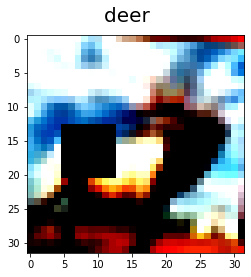

Here are a few samples BEFORE TRANSFORMS APPLIED:


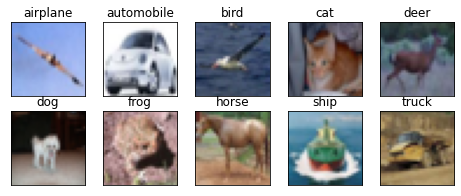

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              GELU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 32, 16, 16]           4,128
              GELU-4           [-1, 32, 16, 16]               0
         Rearrange-5              [-1, 32, 256]               0
         Rearrange-6           [-1, 256, 32, 1]               0
            Conv2d-7            [-1, 64, 32, 1]          16,448
         Rearrange-8               [-1, 32, 64]               0
           Dropout-9               [-1, 33, 64]               0
        LayerNorm-10               [-1, 33, 64]             128
        Rearrange-11            [-1, 64, 33, 1]               0
           Conv2d-12           [-1, 192, 33, 1]          12,288
        Rearrange-13              [-1, 33, 192]               0
          Softmax-14            [-

  0%|          | 0/980 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR (for Least Loss value: 1.529294875721244 to be used: 0.6783606914108308
LR suggestion: steepest gradient
Suggested LR: 2.07E-01


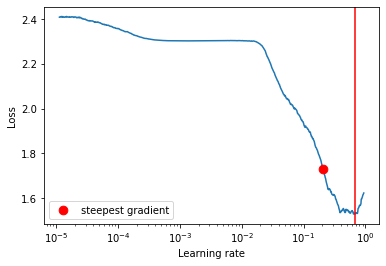

best_lr is 0.6783606914108308


<Figure size 432x288 with 0 Axes>

In [10]:
%matplotlib inline
%run /content/EVA8_API/main.py --cmd lr_find --init_lr 1e-5 --end_lr 1 --lr_range_test_epochs 10

### With the best_lr found from above "lr_find" run, model is trained by running the main.py script under "train" command



CUDA Available? True

	Here are the different args values for this run:
	cmd : train
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 0.0001
	end_lr : 1
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.207
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model :  
Files already downloaded and verified

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True
[Stats from Train Dat

torch.Size([512, 3, 32, 32])
torch.Size([512])
Saving plot for a sample to ascertain RF required for edges & gradient /content/EVA8_API/./data/data_stats.png


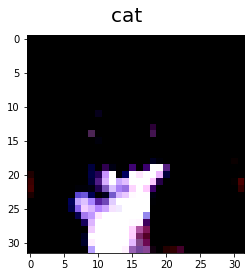

Here are a few samples BEFORE TRANSFORMS APPLIED:


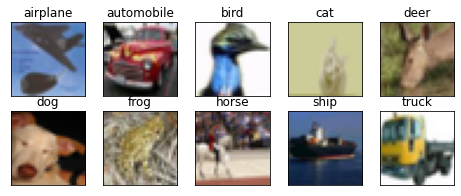

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              GELU-2           [-1, 32, 32, 32]               0
            Conv2d-3           [-1, 32, 16, 16]           4,128
              GELU-4           [-1, 32, 16, 16]               0
         Rearrange-5              [-1, 32, 256]               0
         Rearrange-6           [-1, 256, 32, 1]               0
            Conv2d-7            [-1, 64, 32, 1]          16,448
         Rearrange-8               [-1, 32, 64]               0
           Dropout-9               [-1, 33, 64]               0
        LayerNorm-10               [-1, 33, 64]             128
        Rearrange-11            [-1, 64, 33, 1]               0
           Conv2d-12           [-1, 192, 33, 1]          12,288
        Rearrange-13              [-1, 33, 192]               0
          Softmax-14            [-

Loss=2.405869483947754 Batch_id=97 Accuracy=19.18: 100%|██████████| 98/98 [00:05<00:00, 18.20it/s]



Test set: Average loss: 0.0041, Accuracy: 2268/10000 (22.68%)

validation-accuracy improved from 0 to 22.68, saving model to /content/EVA8_API/./saved_models/CIFAR10_model_epoch-1_L1-1_L2-0_val_acc-22.68.h5
EPOCH: 2
LR: 0.05803619631901841


Loss=2.5853610038757324 Batch_id=97 Accuracy=19.60: 100%|██████████| 98/98 [00:05<00:00, 17.83it/s]



Test set: Average loss: 0.0045, Accuracy: 1487/10000 (14.87%)

EPOCH: 3
LR: 0.0953723926380368


Loss=2.5318238735198975 Batch_id=97 Accuracy=15.50: 100%|██████████| 98/98 [00:05<00:00, 18.00it/s]



Test set: Average loss: 0.0045, Accuracy: 1599/10000 (15.99%)

EPOCH: 4
LR: 0.1327085889570552


Loss=2.7241134643554688 Batch_id=97 Accuracy=12.60: 100%|██████████| 98/98 [00:05<00:00, 17.60it/s]



Test set: Average loss: 0.0046, Accuracy: 1064/10000 (10.64%)

EPOCH: 5
LR: 0.1700447852760736


Loss=2.661092519760132 Batch_id=97 Accuracy=13.27: 100%|██████████| 98/98 [00:05<00:00, 17.40it/s]



Test set: Average loss: 0.0047, Accuracy: 1018/10000 (10.18%)

EPOCH: 6
LR: 0.20688994092373791


Loss=2.770573854446411 Batch_id=97 Accuracy=12.85: 100%|██████████| 98/98 [00:05<00:00, 17.46it/s]



Test set: Average loss: 0.0047, Accuracy: 1161/10000 (11.61%)

EPOCH: 7
LR: 0.1961041514500537


Loss=2.728909969329834 Batch_id=97 Accuracy=12.73: 100%|██████████| 98/98 [00:05<00:00, 17.59it/s]



Test set: Average loss: 0.0046, Accuracy: 1278/10000 (12.78%)

EPOCH: 8
LR: 0.18531836197636947


Loss=2.6508164405822754 Batch_id=97 Accuracy=13.39: 100%|██████████| 98/98 [00:05<00:00, 17.91it/s]



Test set: Average loss: 0.0045, Accuracy: 1417/10000 (14.17%)

EPOCH: 9
LR: 0.17453257250268528


Loss=2.6197385787963867 Batch_id=97 Accuracy=13.40: 100%|██████████| 98/98 [00:05<00:00, 17.87it/s]



Test set: Average loss: 0.0045, Accuracy: 1480/10000 (14.80%)

EPOCH: 10
LR: 0.16374678302900106


Loss=2.580998420715332 Batch_id=97 Accuracy=13.12: 100%|██████████| 98/98 [00:05<00:00, 17.51it/s]



Test set: Average loss: 0.0046, Accuracy: 1398/10000 (13.98%)

EPOCH: 11
LR: 0.15296099355531684


Loss=2.573256015777588 Batch_id=97 Accuracy=12.81: 100%|██████████| 98/98 [00:05<00:00, 16.98it/s]



Test set: Average loss: 0.0046, Accuracy: 1333/10000 (13.33%)

EPOCH: 12
LR: 0.14217520408163264


Loss=2.488589286804199 Batch_id=97 Accuracy=12.76: 100%|██████████| 98/98 [00:05<00:00, 16.74it/s]



Test set: Average loss: 0.0045, Accuracy: 1511/10000 (15.11%)

EPOCH: 13
LR: 0.13138941460794842


Loss=2.6175787448883057 Batch_id=97 Accuracy=12.93: 100%|██████████| 98/98 [00:05<00:00, 16.72it/s]



Test set: Average loss: 0.0046, Accuracy: 1306/10000 (13.06%)

EPOCH: 14
LR: 0.12060362513426422


Loss=2.522526264190674 Batch_id=97 Accuracy=12.64: 100%|██████████| 98/98 [00:05<00:00, 17.13it/s]



Test set: Average loss: 0.0046, Accuracy: 1336/10000 (13.36%)

EPOCH: 15
LR: 0.10981783566058001


Loss=2.46802020072937 Batch_id=97 Accuracy=12.58: 100%|██████████| 98/98 [00:05<00:00, 17.01it/s]



Test set: Average loss: 0.0045, Accuracy: 1224/10000 (12.24%)

EPOCH: 16
LR: 0.0990320461868958


Loss=2.469705104827881 Batch_id=97 Accuracy=13.18: 100%|██████████| 98/98 [00:05<00:00, 17.22it/s]



Test set: Average loss: 0.0045, Accuracy: 1454/10000 (14.54%)

EPOCH: 17
LR: 0.0882462567132116


Loss=2.4956634044647217 Batch_id=97 Accuracy=12.97: 100%|██████████| 98/98 [00:05<00:00, 16.83it/s]



Test set: Average loss: 0.0045, Accuracy: 1406/10000 (14.06%)

EPOCH: 18
LR: 0.07746046723952738


Loss=2.4935874938964844 Batch_id=97 Accuracy=13.03: 100%|██████████| 98/98 [00:05<00:00, 16.70it/s]



Test set: Average loss: 0.0045, Accuracy: 1532/10000 (15.32%)

EPOCH: 19
LR: 0.06667467776584315


Loss=2.4721839427948 Batch_id=97 Accuracy=14.32: 100%|██████████| 98/98 [00:05<00:00, 16.99it/s]



Test set: Average loss: 0.0045, Accuracy: 1604/10000 (16.04%)

EPOCH: 20
LR: 0.05588888829215896


Loss=2.500047206878662 Batch_id=97 Accuracy=14.77: 100%|██████████| 98/98 [00:05<00:00, 17.09it/s]



Test set: Average loss: 0.0045, Accuracy: 1700/10000 (17.00%)

EPOCH: 21
LR: 0.04510309881847474


Loss=2.542085647583008 Batch_id=97 Accuracy=14.87: 100%|██████████| 98/98 [00:05<00:00, 16.82it/s]



Test set: Average loss: 0.0045, Accuracy: 1531/10000 (15.31%)

EPOCH: 22
LR: 0.03431730934479055


Loss=2.539330244064331 Batch_id=97 Accuracy=14.83: 100%|██████████| 98/98 [00:05<00:00, 16.97it/s]



Test set: Average loss: 0.0045, Accuracy: 1515/10000 (15.15%)

EPOCH: 23
LR: 0.023531519871106327


Loss=2.556309700012207 Batch_id=97 Accuracy=14.89: 100%|██████████| 98/98 [00:05<00:00, 16.98it/s]



Test set: Average loss: 0.0045, Accuracy: 1486/10000 (14.86%)

EPOCH: 24
LR: 0.012745730397422106


Loss=2.537597417831421 Batch_id=97 Accuracy=15.31: 100%|██████████| 98/98 [00:05<00:00, 17.08it/s]



Test set: Average loss: 0.0045, Accuracy: 1616/10000 (16.16%)



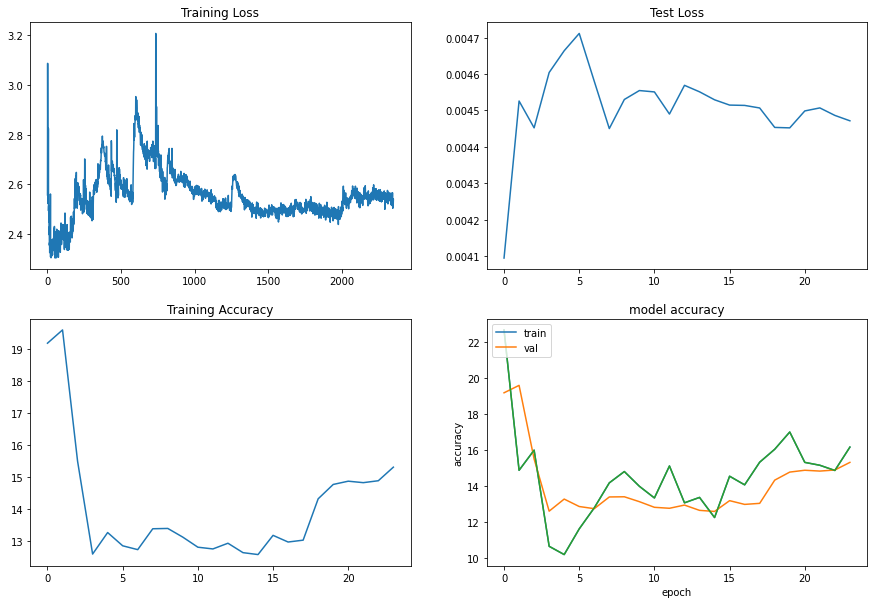

<Figure size 432x288 with 0 Axes>

In [11]:
%matplotlib inline
%run  /content/EVA8_API/main.py --cmd train --best_lr 2.07E-01 

### With the best_model found from above "train" run, saved best model above: CIFAR10_model_epoch-24_L1-1_L2-0_val_acc-41.1.h5 is loaded to get confusion matrix etc.



CUDA Available? True

	Here are the different args values for this run:
	cmd : test
	IPYNB_ENV : True
	use_albumentations : True
	SEED : 1
	dataset : CIFAR10
	img_size : (32, 32)
	batch_size : 512
	epochs : 24
	criterion : CrossEntropyLoss()
	init_lr : 0.0001
	end_lr : 1
	max_lr_epochs : 5
	lr_range_test_epochs : 10
	best_lr : 0.03
	cycle_momentum : True
	div_factor : 10
	optimizer : <class 'torch.optim.adam.Adam'>
	cuda : True
	dropout : 0.08
	l1_weight : 2.5e-05
	l2_weight_decay : 0.0002125
	L1 : True
	L2 : False
	data : ./data/
	best_model_path : ./saved_models/
	prefix : data
	best_model : CIFAR10_model_epoch-1_L1-1_L2-0_val_acc-22.68.h5
Files already downloaded and verified

The mean & std-dev tuples for the CIFAR10 dataset:
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Using albumentation lib for image-augmentation & other transforms
************
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verifi

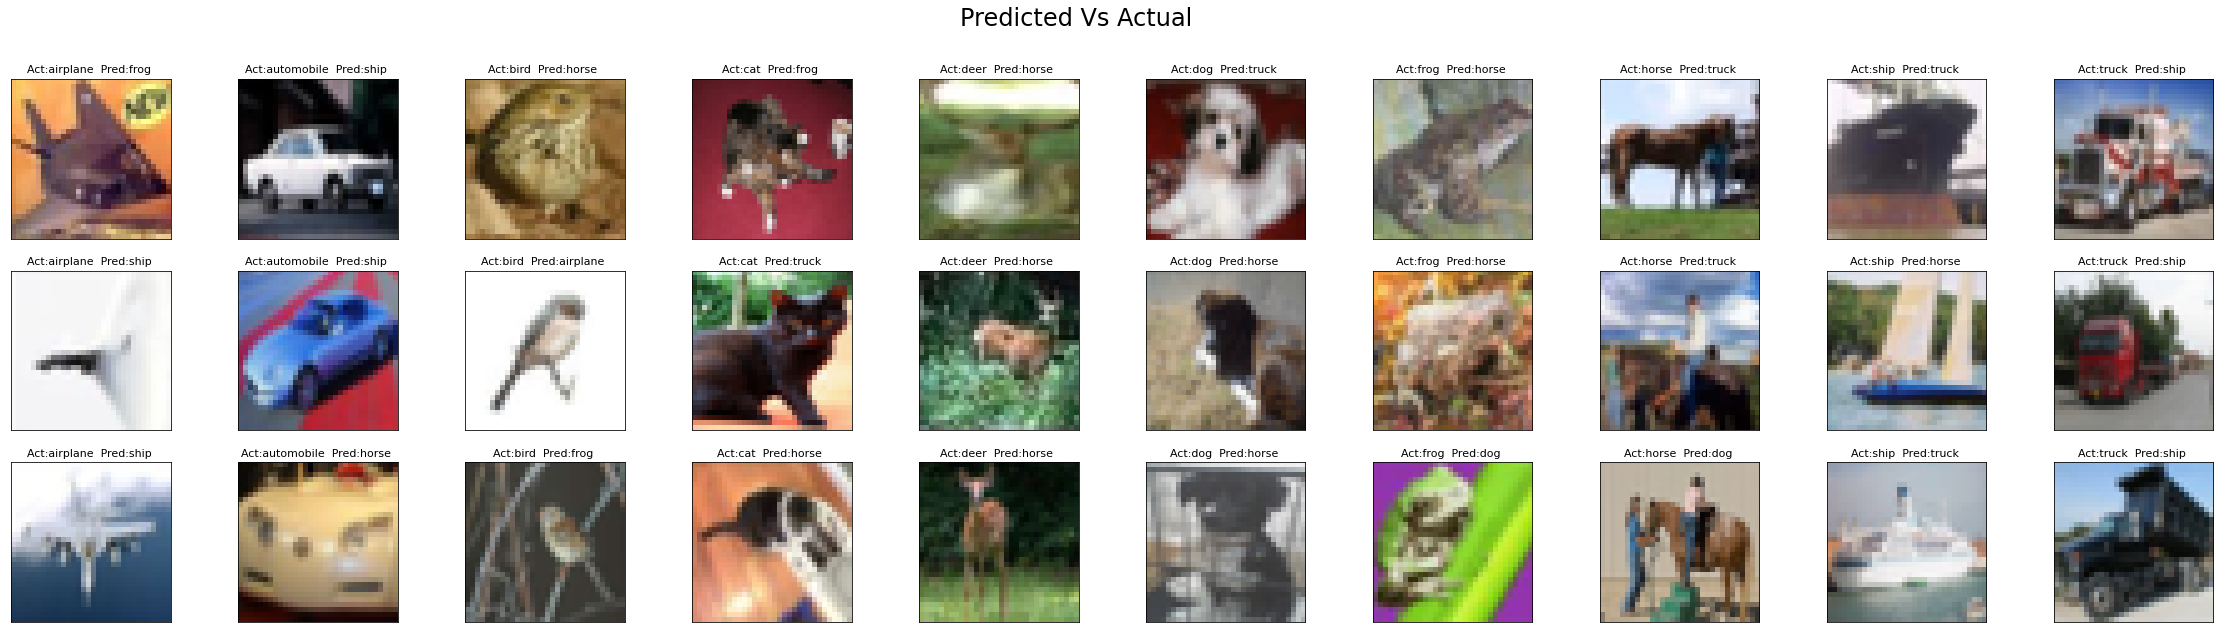

<Figure size 432x288 with 0 Axes>

In [12]:
%matplotlib inline
%run  /content/EVA8_API/main.py --cmd test --best_model CIFAR10_model_epoch-1_L1-1_L2-0_val_acc-22.68.h5